# Filters visualisation with matplotlib in Keras

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K
import math
import keras.callbacks



Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

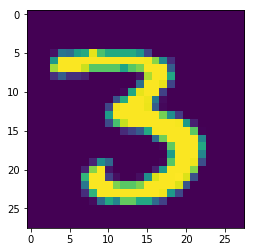

In [7]:
plt.imshow(X_train[12])

In [8]:
# Change shape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, dim_ordering="th", activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3))
model.add(Activation(K.tanh))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28..., data_format="channels_first")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  after removing the cwd from sys.path.


In [10]:
model.summary()
print model.output_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 24, 32)        7520      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               737408    
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 252s - loss: 0.2361 - acc: 0.9288   
Epoch 2/10
60000/60000 [==============================] - 253s - loss: 0.0912 - acc: 0.9728   
Epoch 3/10
60000/60000 [==============================] - 259s - loss: 0.0682 - acc: 0.9789   
Epoch 4/10
60000/60000 [==============================] - 256s - loss: 0.0577 - acc: 0.9818   
Epoch 5/10
60000/60000 [==============================] - 251s - loss: 0.0512 - acc: 0.9842   
Epoch 6/10
60000/60000 [==============================] - 250s - loss: 0.0449 - acc: 0.9863   
Epoch 7/10
60000/60000 [==============================] - 254s - loss: 0.0398 - acc: 0.9871   
Epoch 8/10
60000/60000 [==============================] - 251s - loss: 0.0404 - acc: 0.9876   
Epoch 9/10
60000/60000 [==============================] - 249s - loss: 0.0351 - acc: 0.9891   
Epoch 10/10
60000/60000 [==============================] - 247s - loss: 0.0311 - acc: 0.9899   


In [15]:
score = model.evaluate(X_test, Y_test, verbose=1)
print score

 9984/10000 [============================>.] - ETA: 0s[0.035591735866164619, 0.99109999999999998]


In [16]:
# Export model
json_string = model.to_json()
open('my_model_architecture.json', 'w').write(json_string)

yaml_string = model.to_yaml()
open('my_model_architecture.yml', 'w').write(yaml_string)


In [17]:
#model.save_weights('my_model_weights.h5')

ImportError: `save_weights` requires h5py.

### Visualise filters

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [21]:
print layer_dict

{'activation_1': <keras.layers.core.Activation object at 0x7f559b3f0c90>, 'dense_2': <keras.layers.core.Dense object at 0x7f559d3a5e50>, 'dense_1': <keras.layers.core.Dense object at 0x7f559d3ccc50>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f559d3ccbd0>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f559d426f50>, 'dropout_1': <keras.layers.core.Dropout object at 0x7f559b472090>, 'dropout_2': <keras.layers.core.Dropout object at 0x7f559d3ee650>, 'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f559b3d0990>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f559b34b250>}


*Ref.: Keras model https://keras.io/models/model/*

model.inputs – list of input tensors

In [78]:
def get_layer_filters(layer_name, input_img_data):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    layer_f = K.function(model.inputs, [layer_output])
    filters = np.asarray(layer_f([[input_img_data]]), dtype=np.float32)[0][0]
    return filters


(28, 28)


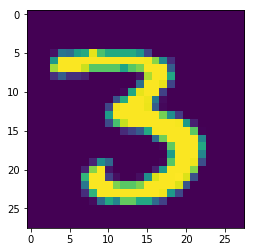

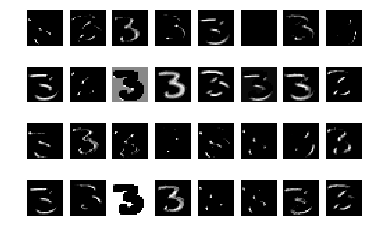

In [84]:
fig = plt.figure()
print X_train[12,0].shape
plt.imshow(X_train[12,0])

filters = get_layer_filters("conv2d_1", X_train[12])
fig = plt.figure()
in_row = 8
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_, cmap="gray")
    i += 1



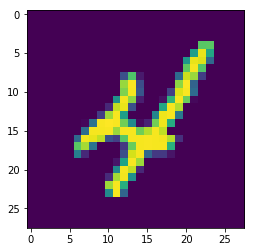

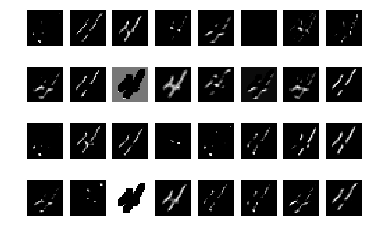

In [99]:
img_index = 9
fig = plt.figure()
plt.imshow(X_train[img_index,0])

filters = get_layer_filters("conv2d_1", X_train[img_index])
fig = plt.figure()
in_row = 8.
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_, cmap="gray")
    i += 1



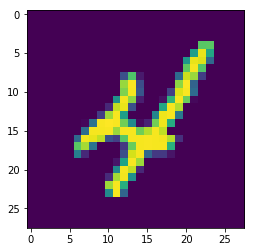

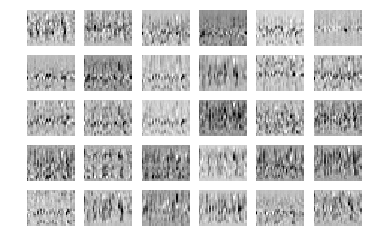

In [100]:
img_index = 9
fig = plt.figure()
plt.imshow(X_train[img_index,0])

filters = get_layer_filters("conv2d_2", X_train[img_index])
fig = plt.figure()
in_row = 6.
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:    
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_, cmap="gray")
    i += 1


